# UFLP

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#UFLP" data-toc-modified-id="p-Median-1.1">UFLP</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Random Data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Road Network Data</a></span></li></ul></li></ul></div>

## Problem Description

### UFLP

Uncapacitated facility location problem is a famous problem in the field of operations research. The problem has only binary decision variables, which is suitable for verifying the performance analysis and comparison of binary optimization algorithms. In this problem, there are customers, suppliers and transshipment costs, each customer should accept supplier orders. The problem has two costs, namely, facility construction cost and transshipment cost. The goal is to minimize the total cost by setting the decision variables 0 or 1, and the values of these variables determine the opening or closing of the facility. The number of feasible solutions is calculated by the number of possible facility locations. When n is the number of possible facility locations, $2n$ different possible solutions of the problem are obtained.

*Parameters*:
* Given the set $K=\{k_1,k_2,...,k_m\}$ of customers, where $m$ is the number of customers and $k_i$ is the ith customer.<br>
* Given $S=\{s_1,s_2,...,s_n\}$, where $n$ is the number of facilities $s_j$ represents the jth facility.<br>
* Given an $m×n$ service matrix $D=[d_{ij}]_{m×n}$, where $d_{ij}$ represents the cost of services when the ith customer receives services from the $j$-th facility.<br>
* $G=\{g_1,g_2,..,g_m\}$ is a set of fixed opening costs of facilities, where $g_j$ represents the opening cost required for the opening of facility $j$.<br>
UFLP 's goal is to find an open facility set and an open facility solution for all customer services, so that the total service cost and the total open facility cost are minimized.<br>

*Decision variables*:
$$y_{ij}=\begin{cases}1,&\text{if facility $j$ provides services for $i$}\\ 0,&\text{otherwise}\end{cases}$$<br>
$$x_j=\begin{cases}1,&\text{if facility $j$ is open}\\ 0,&\text{otherwise}\end{cases}$$<br>

###  Integer programming model:
\begin{array}{lll}
\min & \sum_{i, j \in I} h_i d_{i j} Y_{i j} & \\
\text { s.t. } & \sum_{i \in I} X_i=P, & \\
& Y_{i j} \leq X_j, & \forall i, j \in I, \\
& \sum_{j \in I} Y_{i j}=1, & \forall i \in I, \\
& X_i, Y_{i j} \in\{0,1\}, & \forall i, j \in I .
\end{array}

        

## Setup

In [1]:
import random
from itertools import product
import numpy as np
from location.CModel import *
from location.PModel import *
import pandas as pd

## Example

### Random Data

In [14]:
num_points = 20
num_located = 3  # P: number of located facility in the end
np.random.seed(0)
demand = np.random.randint(10, size=num_points)  #d
cost = np.random.randint(20, size=num_points)  #c
num_people = np.random.randint(6, size=num_points)  # h
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(random.random(), random.random()) for i in range(num_points)]
y, selected, selected_points, unselected_points  = UFLP(num_people=num_people,
                                                demand=demand,
                                                num_points=num_points,
                                                num_located=num_located,
                                                cartesian_prod=cartesian_prod,
                                                cost=cost,
                                                cover=points,
                                                solver=PULP_CBC_CMD()).prob_solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/wangjiayi/opt/anaconda3/envs/wheel/lib/python3.8/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6y/wptch4md45b57rln4y36dxs80000gn/T/1eba57514857440e8e1aa80efb561f08-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/6y/wptch4md45b57rln4y36dxs80000gn/T/1eba57514857440e8e1aa80efb561f08-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 426 COLUMNS
At line 2809 RHS
At line 3231 BOUNDS
At line 3652 ENDATA
Problem MODEL has 421 rows, 420 columns and 1220 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 11.624 - 0.00 seconds
Cgl0004I processed model has 421 rows, 420 columns (420 integer (420 of which binary)) and 1220 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 11.624
Cbc0038I Before mini branch and bound, 420 i

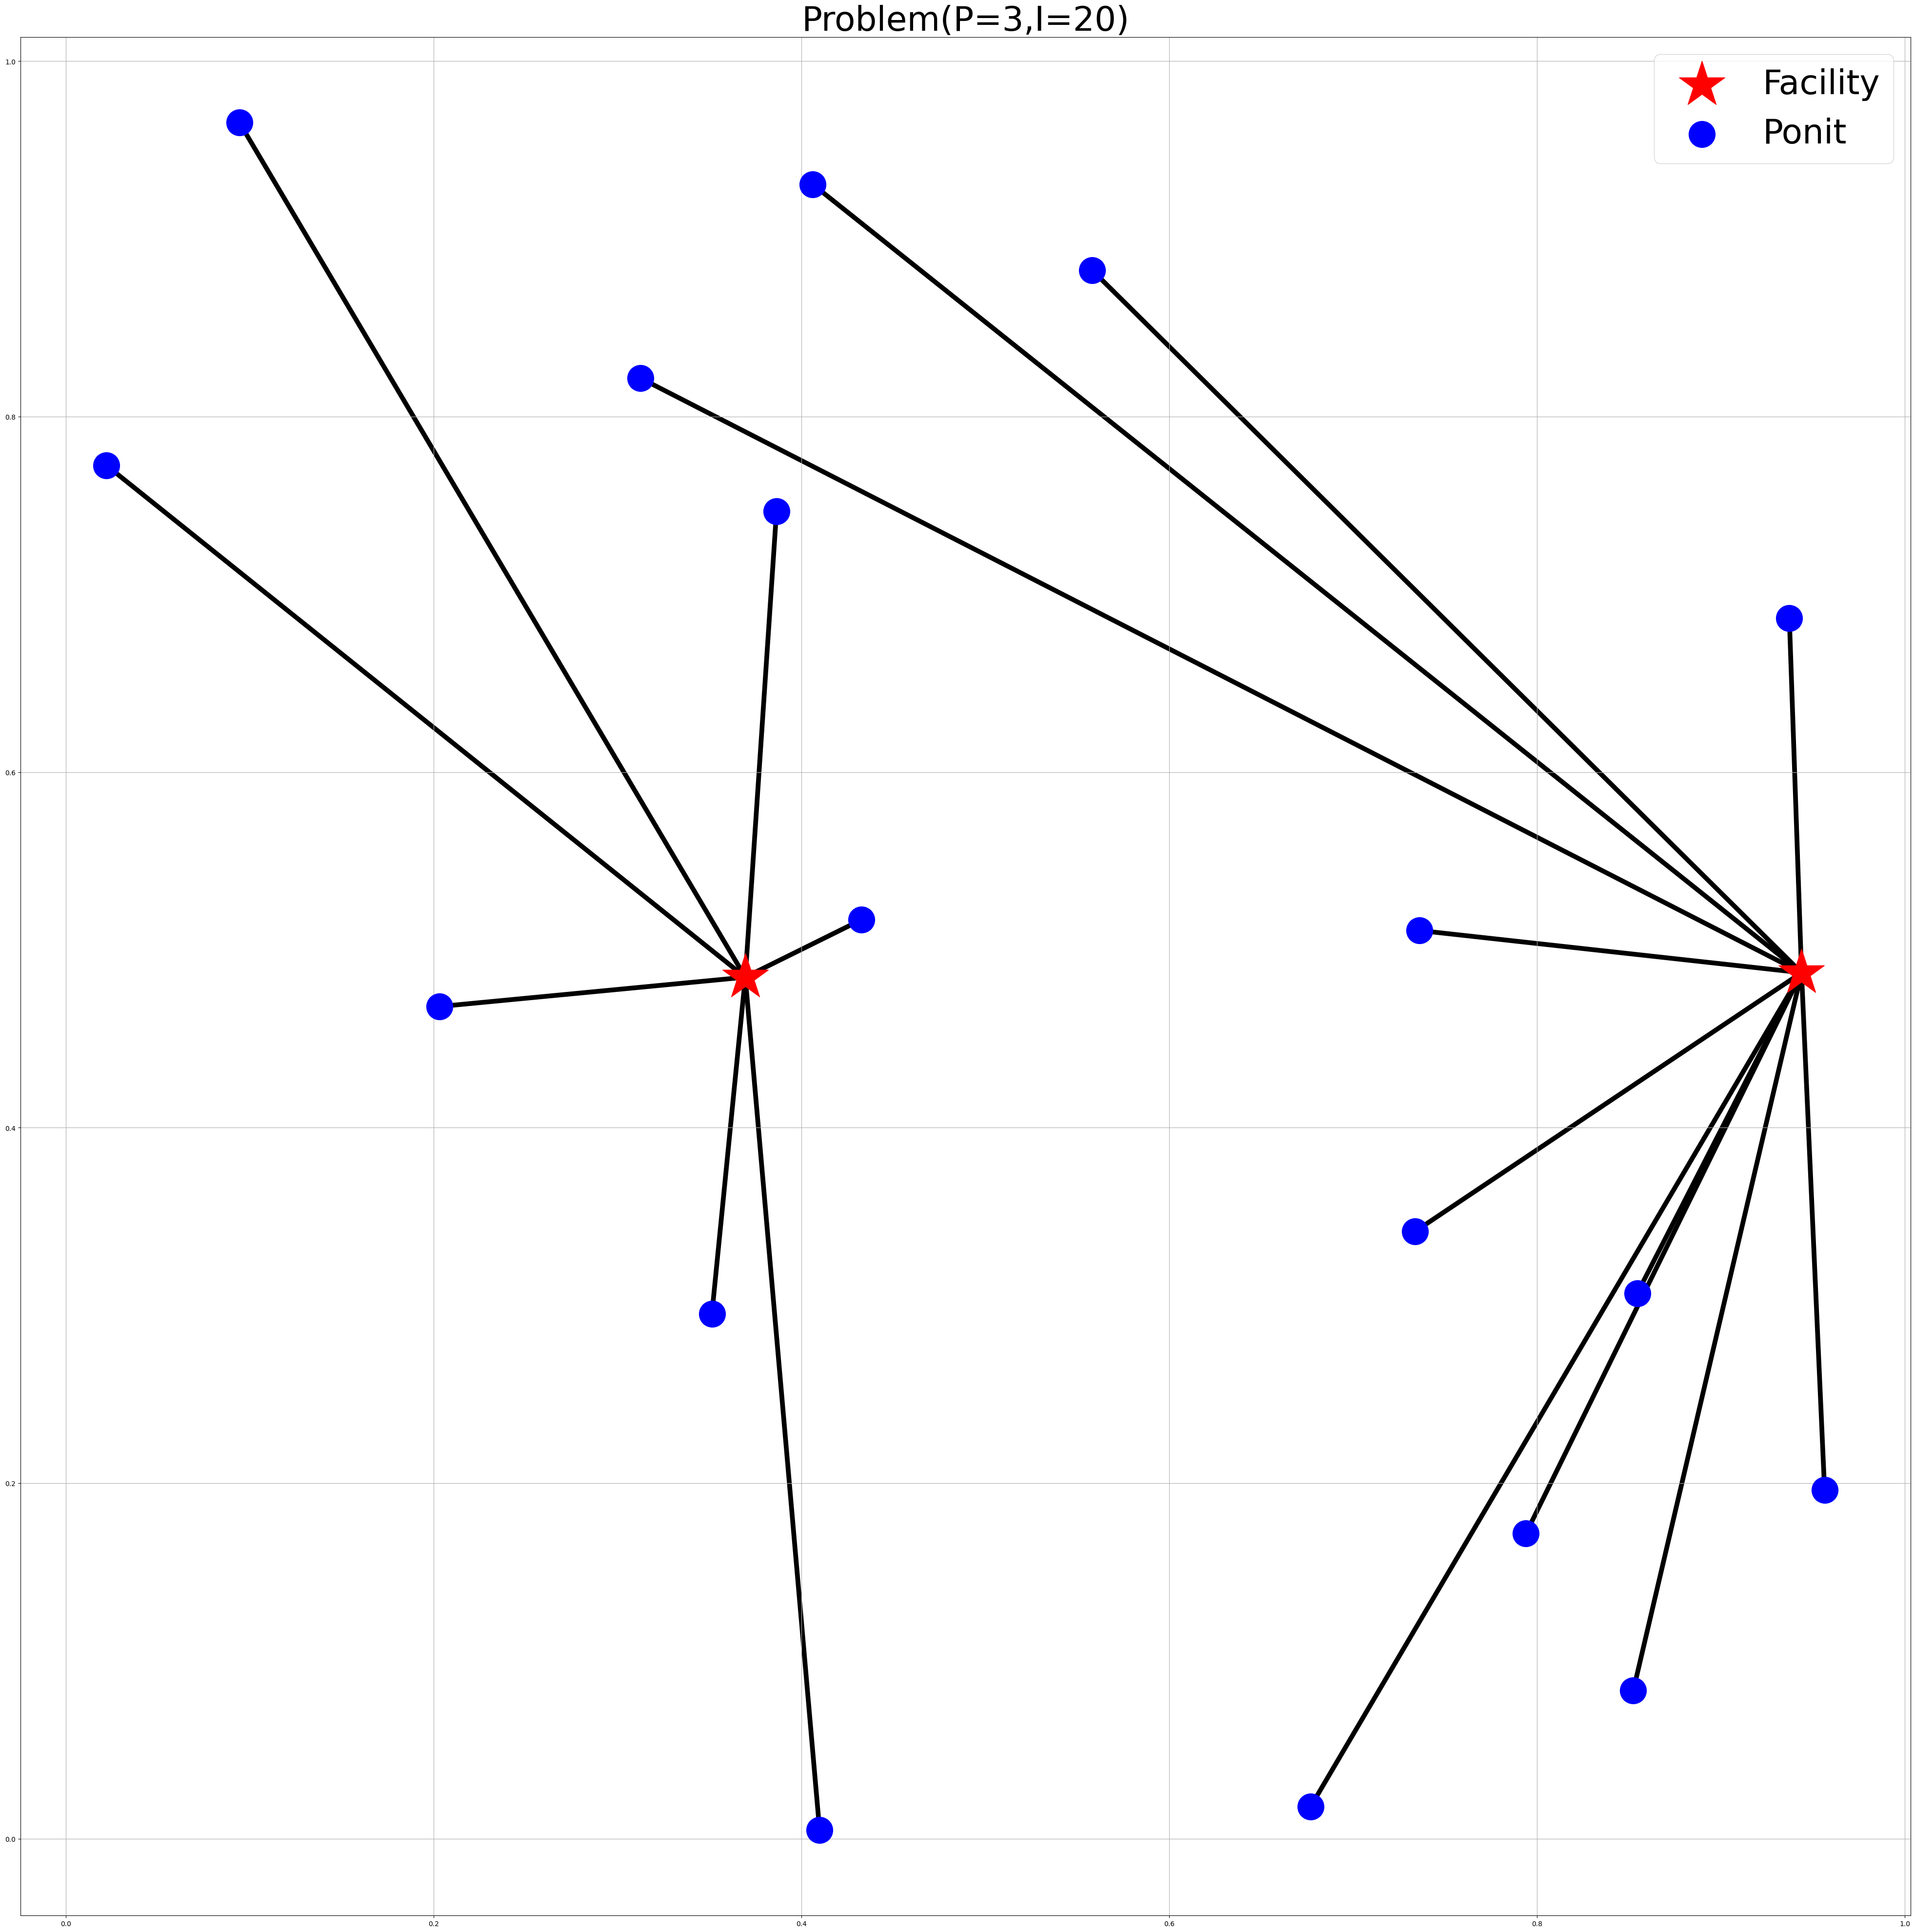

In [ ]:
#Image representation
plt.figure(figsize=(50,50))
name = 'Problem(P=' + str(num_located) + ',I=' + str(num_points) + ')'
plt.title(name, fontsize = 50)
#Points
plt.scatter(*zip(*selected_points), c='Red', marker='*',s=5000,label = 'Facility',zorder=2)   
plt.scatter(*zip(*unselected_points), c='Blue', marker='o',s=1500, label = 'Ponit', zorder=3)
#Lines
for i in range(num_points):
    for j in range(num_points):
        if y[i][j].varValue == 1 :
            pts = [points[i], points[j]]
            plt.plot(*zip(*pts), c='Black', linewidth=7, zorder=1)


plt.grid(True)   
plt.legend(loc='best', fontsize = 50) 
plt.show()

### Road Network Data

In [10]:
df = pd.read_csv('北京POI裁剪.csv',encoding='gbk')
df = df.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = df[['long', 'lat']]
num_points = df.shape[0]
num_located = 10
np.random.seed(0)
num_people = np.random.randint(1,2, size=num_points)
demand = np.random.randint(20, size=num_points)  #d
cost = np.random.randint(20, size=num_points)  #c
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]

In [11]:
y, selected, selected_points, unselected_points  = UFLP(num_people=num_people,
                                                demand=demand,
                                                num_points=num_points,
                                                num_located=num_located,
                                                cartesian_prod=cartesian_prod,
                                                cost=cost,
                                                cover=points,
                                                solver=PULP_CBC_CMD()).prob_solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/wangjiayi/opt/anaconda3/envs/wheel/lib/python3.8/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6y/wptch4md45b57rln4y36dxs80000gn/T/89e44eeb19344cd39df83d9d98a1f101-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/6y/wptch4md45b57rln4y36dxs80000gn/T/89e44eeb19344cd39df83d9d98a1f101-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 14048 COLUMNS
At line 97941 RHS
At line 111985 BOUNDS
At line 126028 ENDATA
Problem MODEL has 14043 rows, 14042 columns and 41890 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4.92874 - 0.52 seconds
Cgl0004I processed model has 14043 rows, 14042 columns (14042 integer (14042 of which binary)) and 41890 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 4.92874
Cbc0038I Before mini 

In [16]:
G = ox.graph_from_address('Beijing', dist=20000, network_type='drive')
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
for j in range(num_points):
    lx = df['lat'][j]
    ly = df['long'][j]
    plt.plot(ly,lx,c='black',marker='o',markersize=20)

ConnectionError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?format=json&limit=1&dedupe=0&q=Beijing (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fa0df750df0>: Failed to establish a new connection: [Errno 60] Operation timed out'))

In [ ]:
G = ox.graph_from_address('Beijing', dist=20000, network_type='drive')
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
for j in range(num_points):
    if j in selected:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c='red',marker='*',markersize=50, zorder=3)
    else:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c="black",marker='o',markersize=20, zorder=2)
#Lines
for i in range(num_points):
    for j in range(num_points):
        if y[i][j].varValue == 1 :
            pts = [points[i], points[j]]
            plt.plot(*zip(*pts), c='#1E90FF', linewidth=3.5, zorder=1)